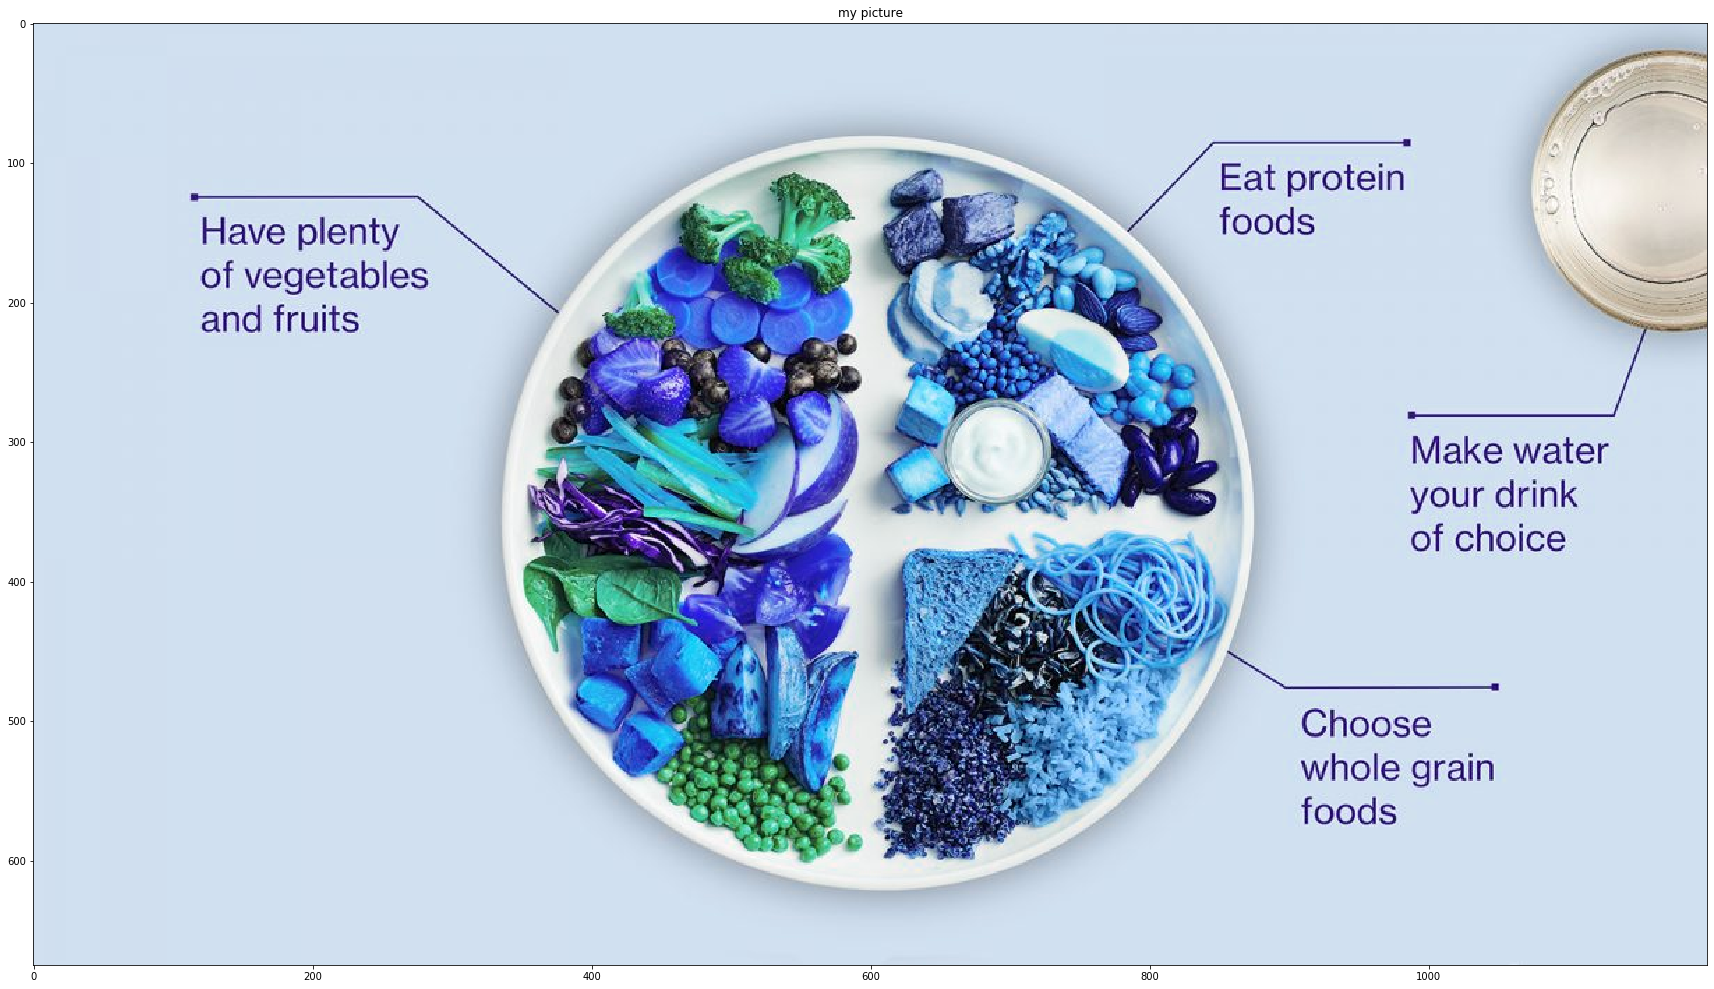

In [11]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

img = cv2.imread("./food.jpg")

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = (30,40)
plt.imshow(img)
plt.title('my picture')
plt.show()

In [8]:
!wget -O food.jpg https://capitalcurrent.ca/wp-content/uploads/2019/01/Food-Guide-2.jpg

--2020-03-31 01:24:28--  https://capitalcurrent.ca/wp-content/uploads/2019/01/Food-Guide-2.jpg
Resolving capitalcurrent.ca (capitalcurrent.ca)... 69.27.106.22
Connecting to capitalcurrent.ca (capitalcurrent.ca)|69.27.106.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116823 (114K) [image/jpeg]
Saving to: ‘food.jpg’

food.jpg            100%[===================>] 114.08K  --.-KB/s    in 0.1s    

2020-03-31 01:24:28 (1.03 MB/s) - ‘food.jpg’ saved [116823/116823]



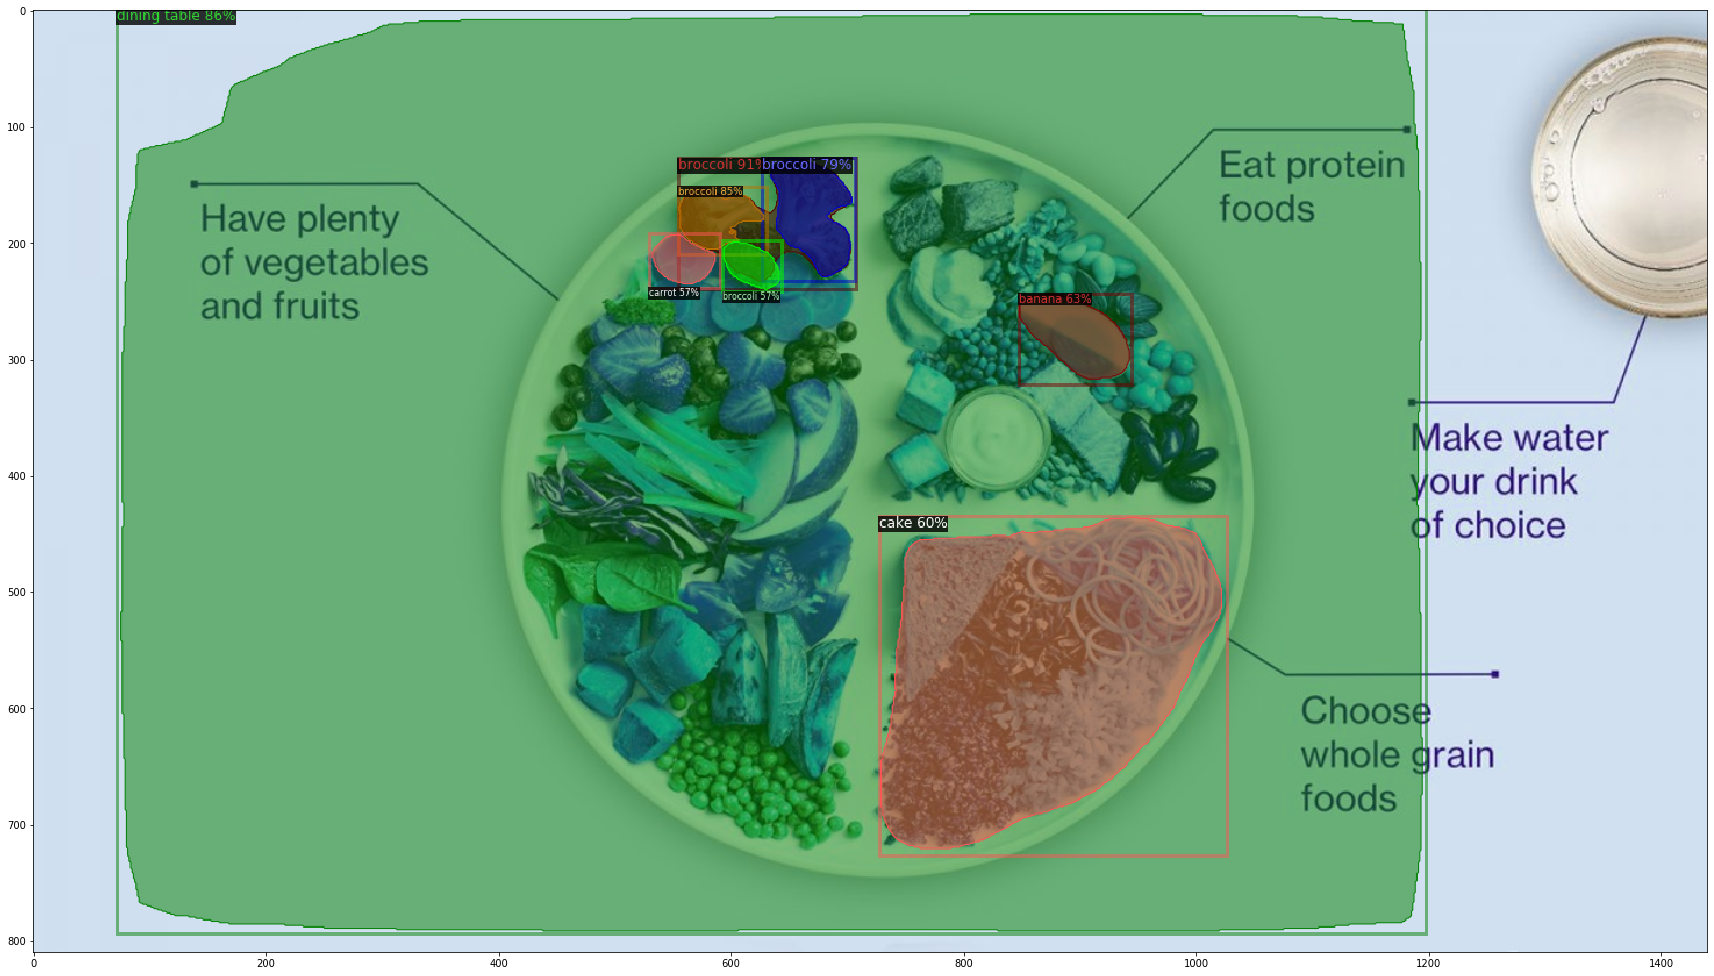

In [12]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)
outputs["instances"].pred_classes
outputs["instances"].pred_boxes
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])